<a href="https://colab.research.google.com/github/cberrioa/Understanding-Transformer-based-Language-Models-for-Bot-Detection-in-Twitter/blob/master/Contextual_similarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from transformers import BertModel, BertTokenizer, GPT2Tokenizer, GPT2Model
import torch
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

In [ ]:
model_name = "BERT"

In [ ]:
max_length = 128
if model_name == "BERT":
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)
elif model_name == "gpt2":
    special_tokens_dict = {'cls_token': '_classify_','bos_token': '_start_', 'pad_token': '<pad>'}
    tokenizer = GPT2Tokenizer.from_pretrained('gpt2', do_lower_case=True)
    tokenizer.add_special_tokens(special_tokens_dict)

100%|██████████| 456318/456318 [00:00<00:00, 623097.57B/s]


In [ ]:
sentence = "Congratulations @LeoDiCaprio #Oscars https://t.co/5WLesgfnbe"
tokens = tokenizer.tokenize(sentence)
print(tokens)

['congratulations', '@', 'leo', '##dic', '##ap', '##rio', '#', 'oscar', '##s', 'https', ':', '/', '/', 't', '.', 'co', '/', '5', '##wl', '##es', '##gf', '##nb', '##e']


In [ ]:
#tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
if model_name == "BERT":
    #model = BertModel.from_pretrained('bert-base-uncased')
    #model = model.cuda()
    model = torch.load("../models/BERT_Classifier_Large.pt")
    model = model.bert
    model.config.output_hidden_states = True
    model.config.is_decoder = False
    model.encoder.output_hidden_states = True
    for i in range(0,len(model.encoder.layer)): 
        model.encoder.layer[i].is_decoder = False
        model.encoder.layer[i].output_hidden_states = True
elif model_name == "gpt2":
    #model = GPT2Model.from_pretrained("gpt2")
    #model = model.cuda()
    model = torch.load("../models/Gpt2_Classifier_Large.pt")
    model = model.transformer
    model.output_hidden_states = True

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:593: SourceChangeWarning: source code of class 'torch.nn.modules.sparse.Embedding' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:593: SourceChangeWarning: source code of class 'torch.nn.modules.dropout.Dropout' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:593: SourceChangeWarning: source code of class 'torch.nn.modules.container.ModuleList' has changed. you can retrieve the original source code by accessing the object's source attribute or

In [ ]:
sentence = "Congratulations @LeoDiCaprio #Oscars https://t.co/5WLesgfnbe"
with torch.no_grad():
    input_ids = torch.tensor(tokenizer.encode(sentence, add_special_tokens=False)).cuda().unsqueeze(0)  # Batch size 1
    outputs = model(input_ids)
    hidden_states = outputs[2]  # The last hidden-state is the first element of the output tuple

In [ ]:
len(hidden_states)

13

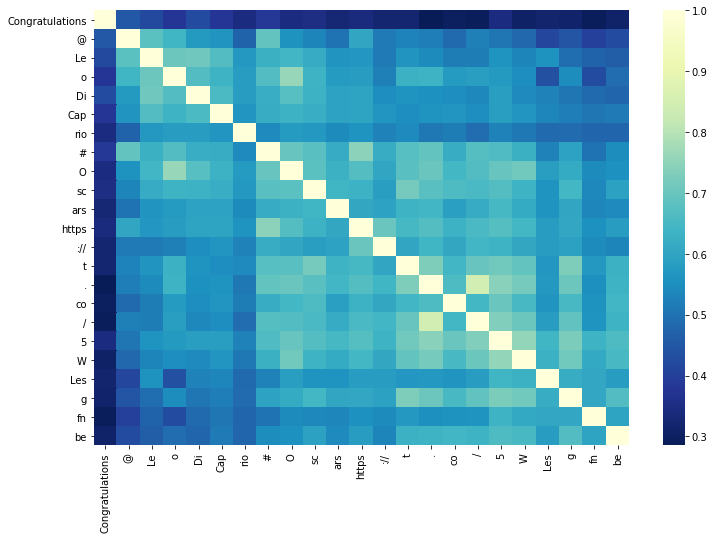

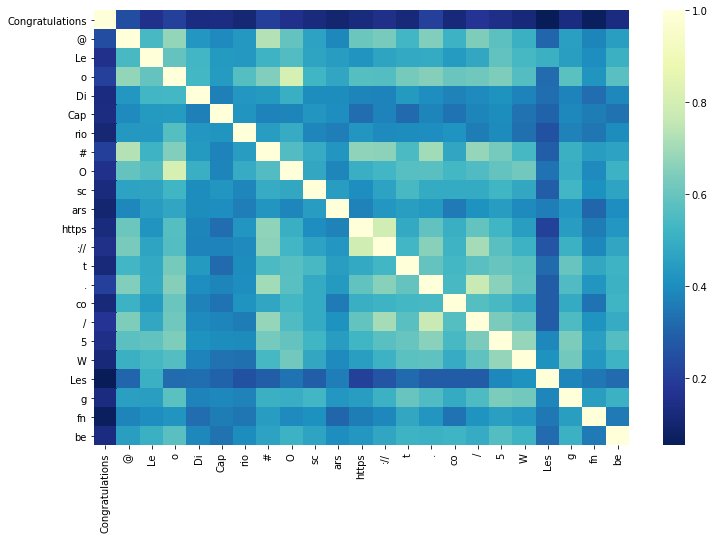

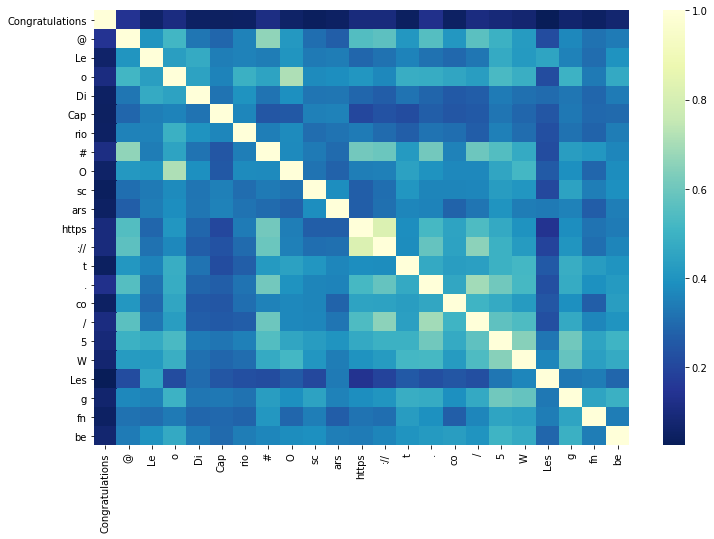

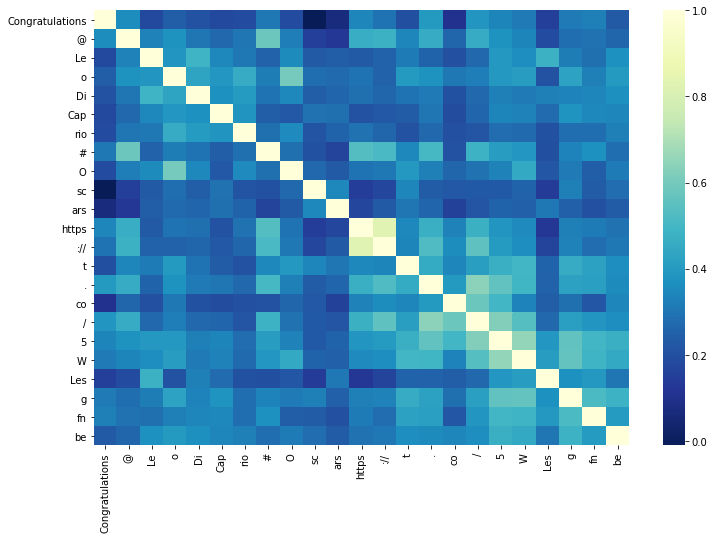

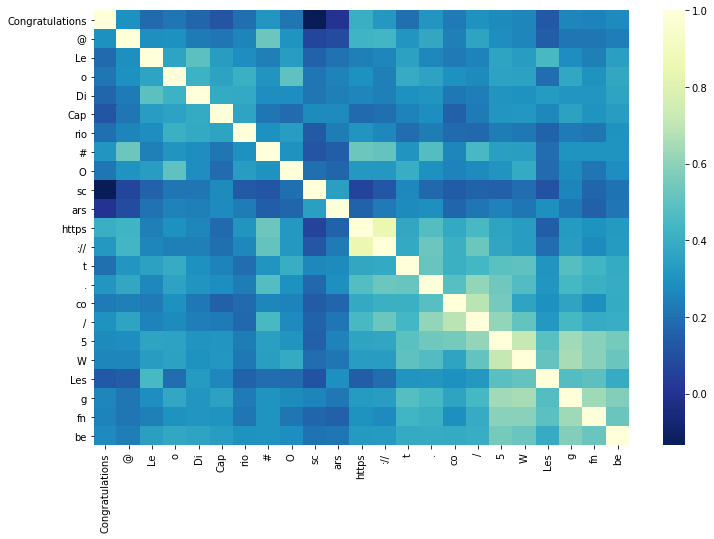

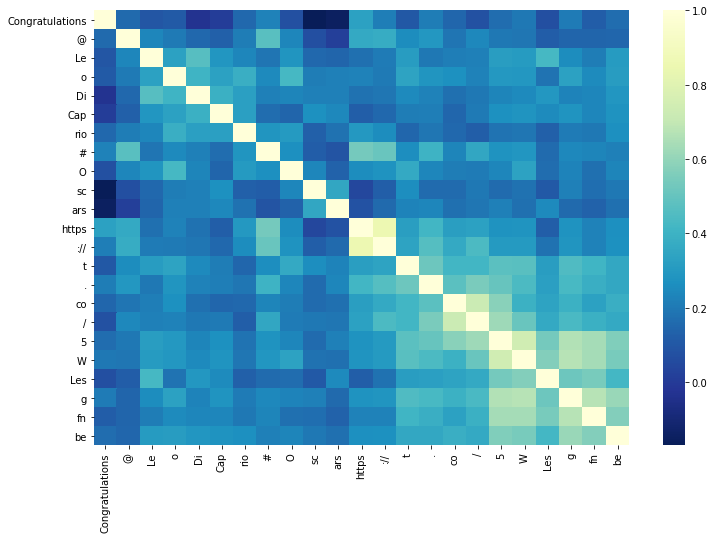

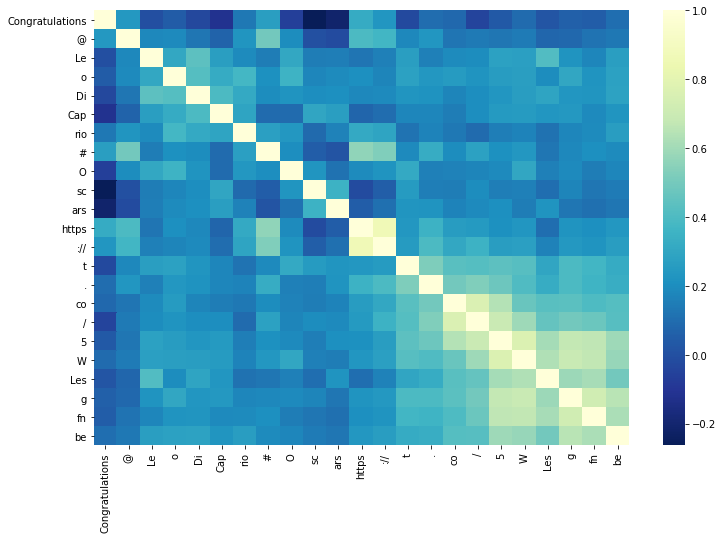

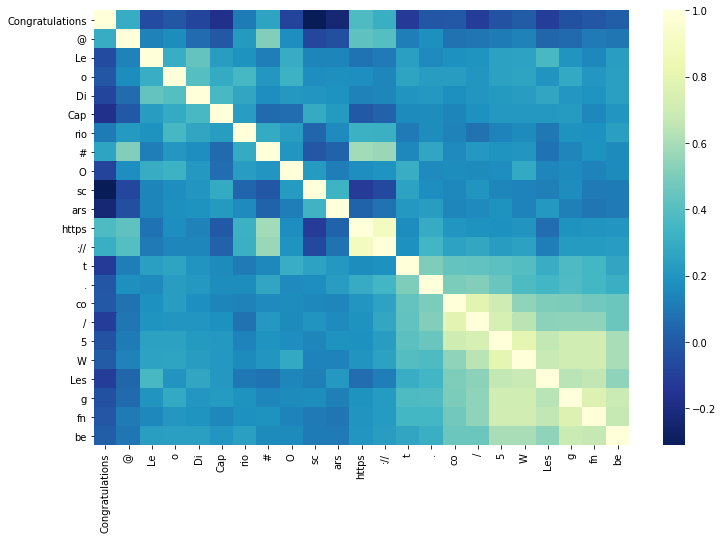

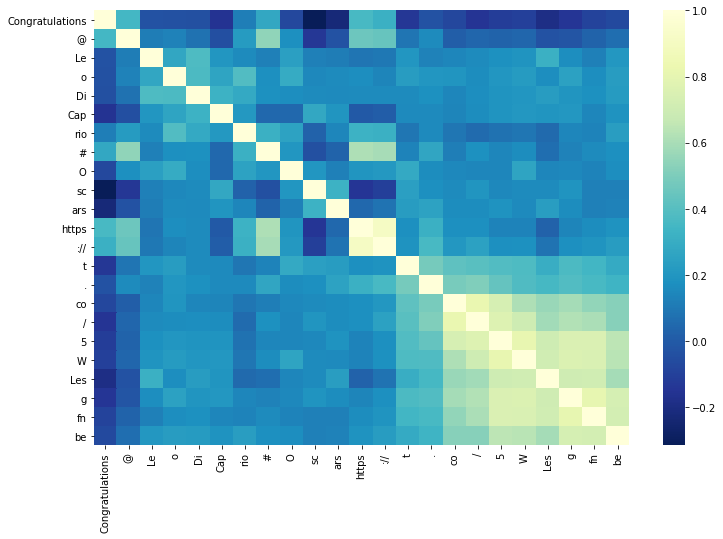

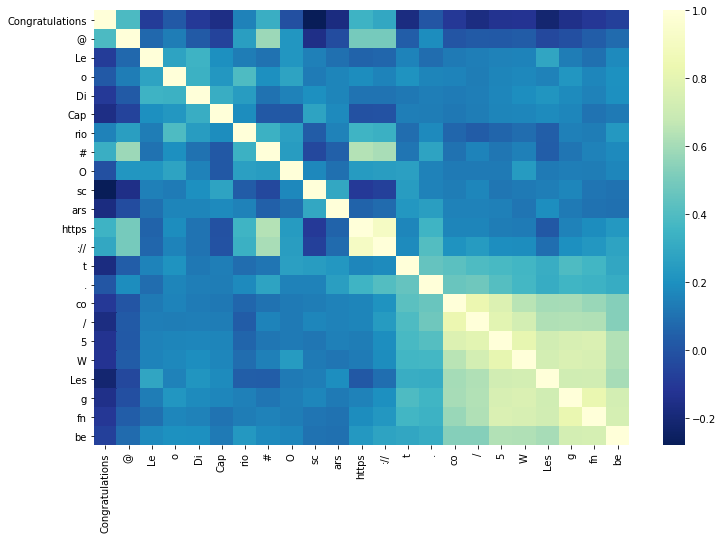

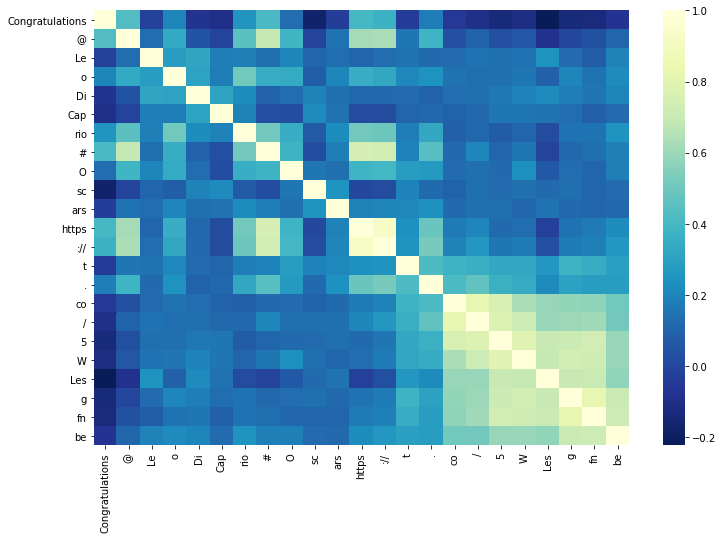

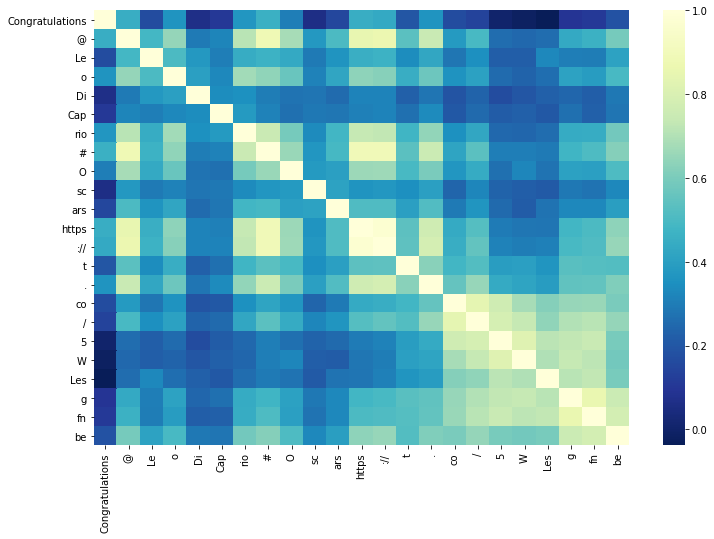

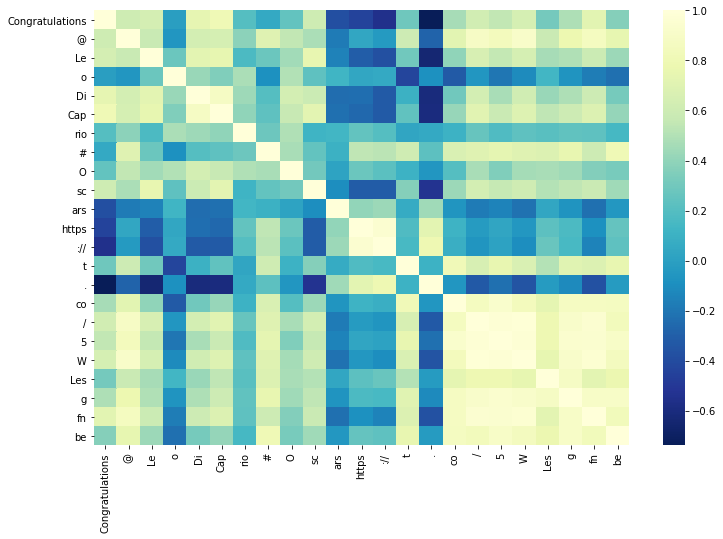

In [ ]:
for i, hidden_state in enumerate(hidden_states):
    hidden_state = hidden_state[0].cpu().numpy()
    contextual_similarity = cosine_similarity(hidden_state,hidden_state)
    ids = tokenizer.encode(sentence,  add_special_tokens=False)
    tokens = tokenizer.convert_ids_to_tokens(ids)
    if(model_name == 'gpt2'):
        tokens = [token[1:] if(token[0]=='Ġ') else token for token in tokens]
    dataframe = pd.DataFrame(contextual_similarity, index=tokens, columns=tokens)
    plt.figure(figsize = (12,8))
    sns.heatmap(dataframe, cmap="YlGnBu_r", yticklabels=True, xticklabels=True)
    #sns.heatmap(dataframe, cmap="YlGnBu_r", yticklabels=True, xticklabels=True, vmin=0,vmax=1)
    plt.yticks(rotation=0)
    plt.show()

In [ ]:
tokenizer.do_lower_case = True

In [ ]:
tokens = tokenizer.tokenize(sentence)
print(tokens)

['Congratulations', 'Ġ@', 'Le', 'o', 'Di', 'Cap', 'rio', 'Ġ#', 'O', 'sc', 'ars', 'Ġhttps', '://', 't', '.', 'co', '/', '5', 'W', 'Les', 'g', 'fn', 'be']
ERROR! Session/line number was not unique in database. History logging moved to new session 60


['Congratulations', 'Ġ@', 'Le', 'o', 'Di', 'Cap', 'rio', 'Ġ#', 'O', 'sc', 'ars', 'Ġhttps', '://', 't', '.', 'co', '/', '5', 'W', 'Les', 'g', 'fn', 'be']


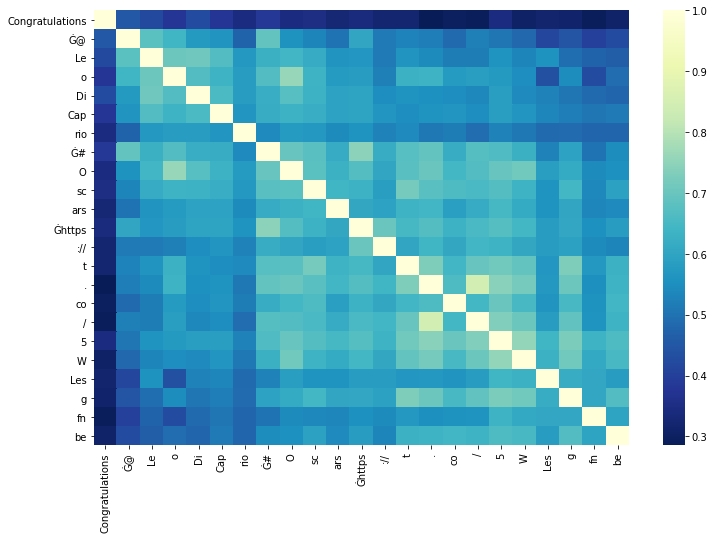

['Congratulations', 'Ġ@', 'Le', 'o', 'Di', 'Cap', 'rio', 'Ġ#', 'O', 'sc', 'ars', 'Ġhttps', '://', 't', '.', 'co', '/', '5', 'W', 'Les', 'g', 'fn', 'be']


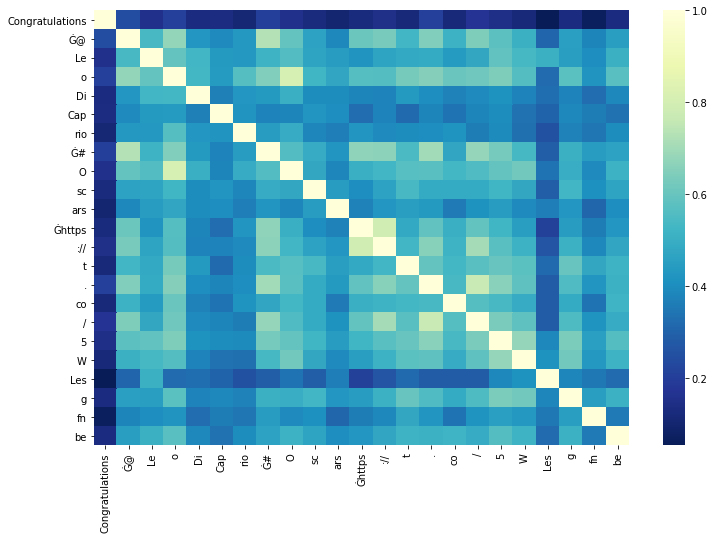

['Congratulations', 'Ġ@', 'Le', 'o', 'Di', 'Cap', 'rio', 'Ġ#', 'O', 'sc', 'ars', 'Ġhttps', '://', 't', '.', 'co', '/', '5', 'W', 'Les', 'g', 'fn', 'be']


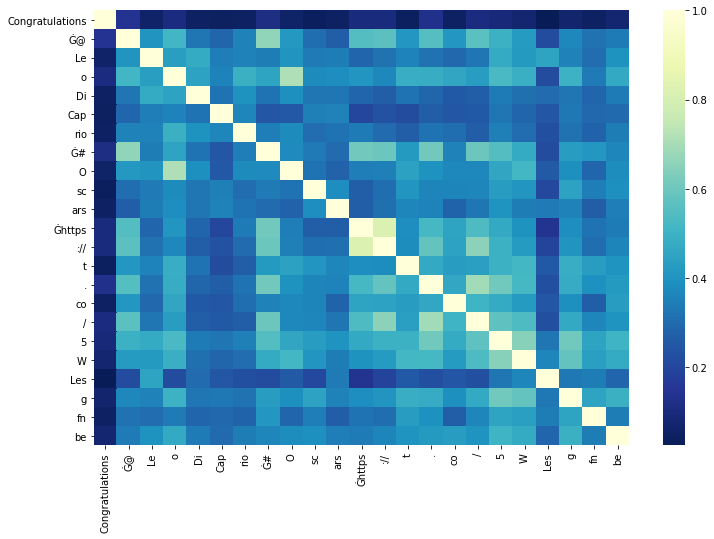

['Congratulations', 'Ġ@', 'Le', 'o', 'Di', 'Cap', 'rio', 'Ġ#', 'O', 'sc', 'ars', 'Ġhttps', '://', 't', '.', 'co', '/', '5', 'W', 'Les', 'g', 'fn', 'be']


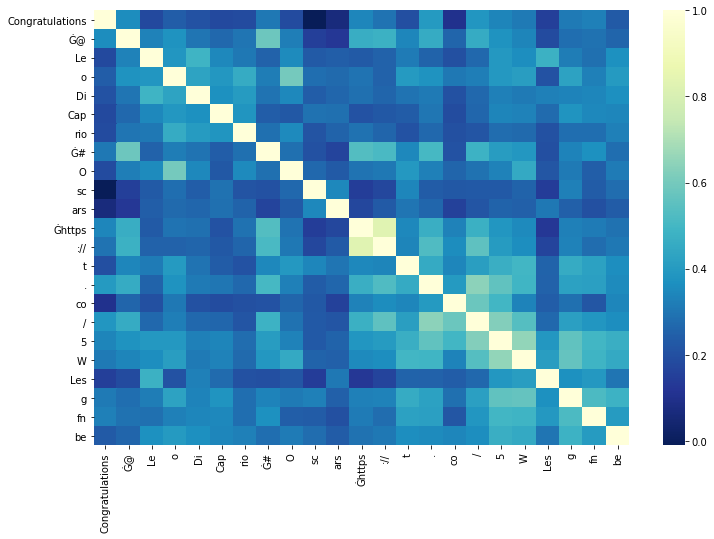

['Congratulations', 'Ġ@', 'Le', 'o', 'Di', 'Cap', 'rio', 'Ġ#', 'O', 'sc', 'ars', 'Ġhttps', '://', 't', '.', 'co', '/', '5', 'W', 'Les', 'g', 'fn', 'be']


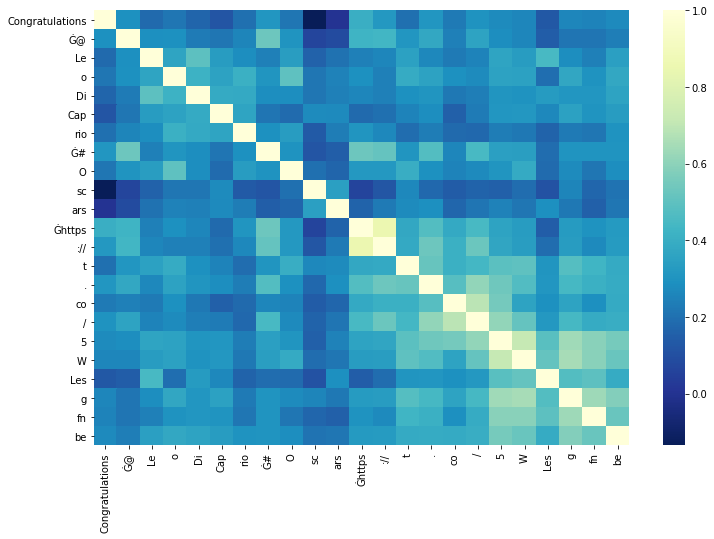

['Congratulations', 'Ġ@', 'Le', 'o', 'Di', 'Cap', 'rio', 'Ġ#', 'O', 'sc', 'ars', 'Ġhttps', '://', 't', '.', 'co', '/', '5', 'W', 'Les', 'g', 'fn', 'be']


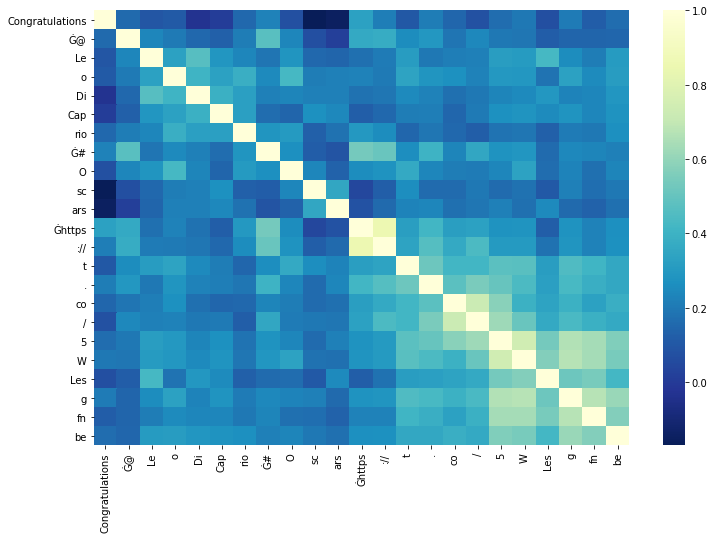

['Congratulations', 'Ġ@', 'Le', 'o', 'Di', 'Cap', 'rio', 'Ġ#', 'O', 'sc', 'ars', 'Ġhttps', '://', 't', '.', 'co', '/', '5', 'W', 'Les', 'g', 'fn', 'be']


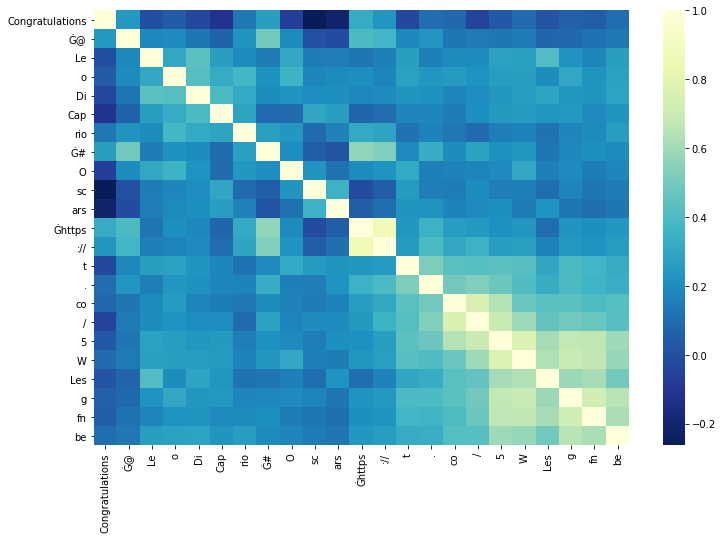

['Congratulations', 'Ġ@', 'Le', 'o', 'Di', 'Cap', 'rio', 'Ġ#', 'O', 'sc', 'ars', 'Ġhttps', '://', 't', '.', 'co', '/', '5', 'W', 'Les', 'g', 'fn', 'be']


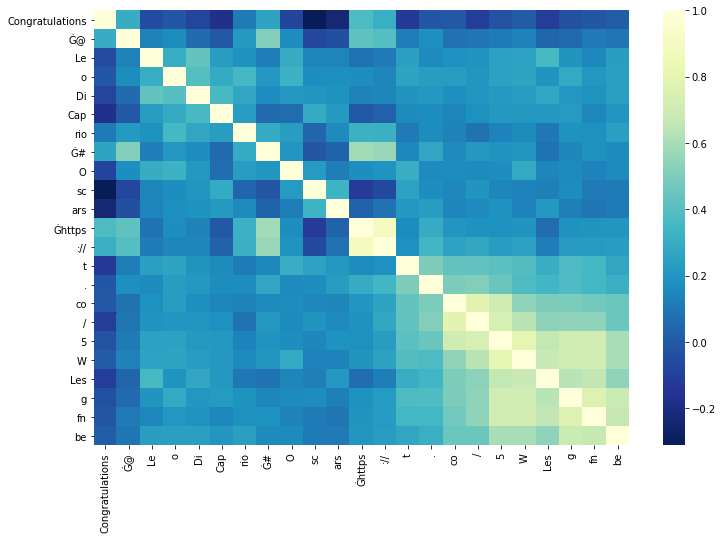

['Congratulations', 'Ġ@', 'Le', 'o', 'Di', 'Cap', 'rio', 'Ġ#', 'O', 'sc', 'ars', 'Ġhttps', '://', 't', '.', 'co', '/', '5', 'W', 'Les', 'g', 'fn', 'be']


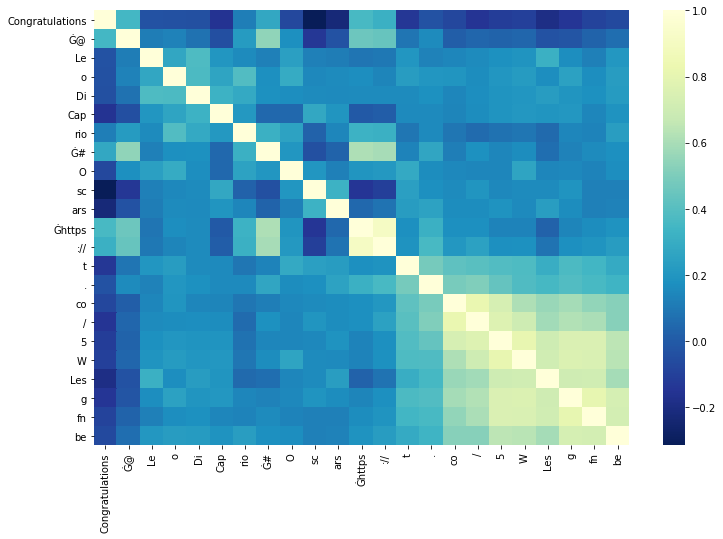

['Congratulations', 'Ġ@', 'Le', 'o', 'Di', 'Cap', 'rio', 'Ġ#', 'O', 'sc', 'ars', 'Ġhttps', '://', 't', '.', 'co', '/', '5', 'W', 'Les', 'g', 'fn', 'be']


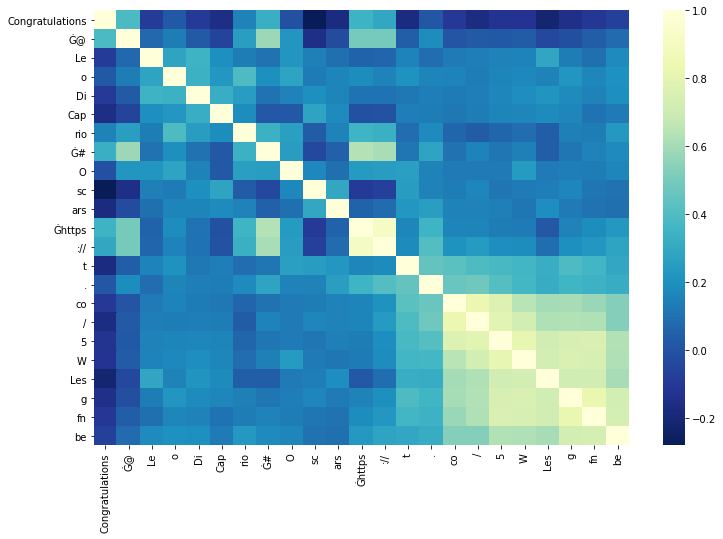

['Congratulations', 'Ġ@', 'Le', 'o', 'Di', 'Cap', 'rio', 'Ġ#', 'O', 'sc', 'ars', 'Ġhttps', '://', 't', '.', 'co', '/', '5', 'W', 'Les', 'g', 'fn', 'be']


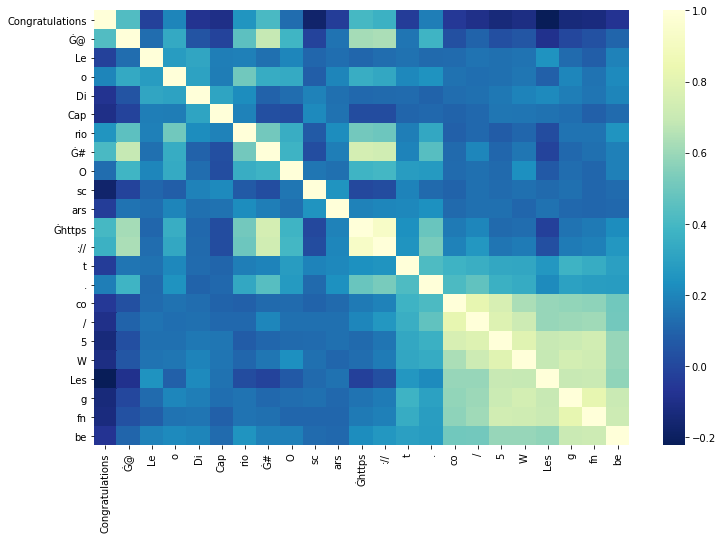

['Congratulations', 'Ġ@', 'Le', 'o', 'Di', 'Cap', 'rio', 'Ġ#', 'O', 'sc', 'ars', 'Ġhttps', '://', 't', '.', 'co', '/', '5', 'W', 'Les', 'g', 'fn', 'be']


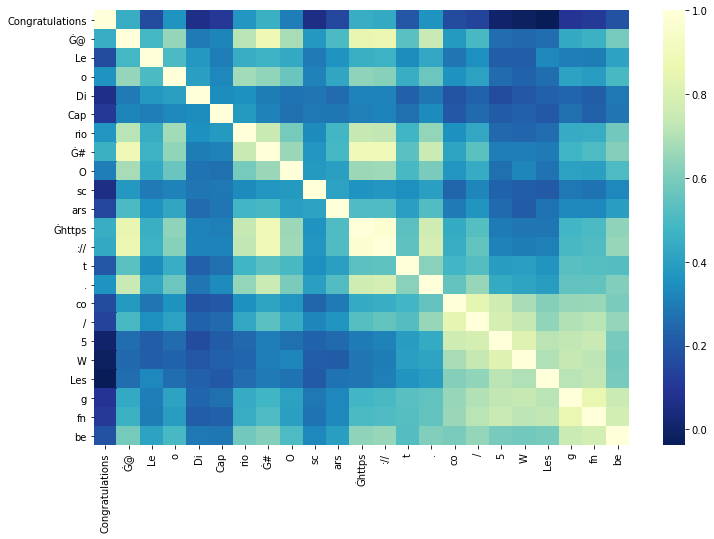

['Congratulations', 'Ġ@', 'Le', 'o', 'Di', 'Cap', 'rio', 'Ġ#', 'O', 'sc', 'ars', 'Ġhttps', '://', 't', '.', 'co', '/', '5', 'W', 'Les', 'g', 'fn', 'be']


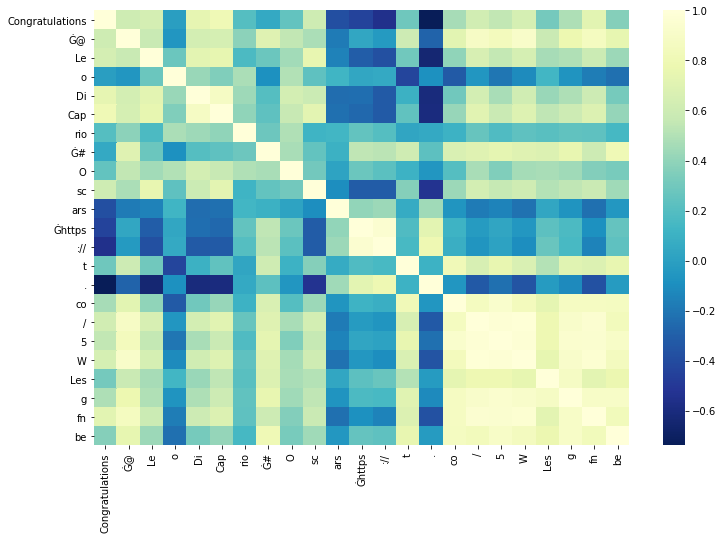

In [ ]:
for i, hidden_state in enumerate(hidden_states):
    hidden_state = hidden_state[0].cpu().numpy()
    contextual_similarity = cosine_similarity(hidden_state,hidden_state)
    tokens = tokenizer.tokenize(sentence)
    print(tokens)
    ids = tokenizer.convert_tokens_to_ids(tokens)
    tokens = tokenizer.convert_ids_to_tokens(ids)
    #if(model_name == 'gpt2'):
    #    tokens = [token[1:] if(token[0]=='Ġ') else token for token in tokens]
    dataframe = pd.DataFrame(contextual_similarity, index=tokens, columns=tokens)
    plt.figure(figsize = (12,8))
    sns.heatmap(dataframe, cmap="YlGnBu_r", yticklabels=True, xticklabels=True)
    plt.yticks(rotation=0)
    plt.show()